In [161]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import seaborn as sns


pd.set_option('display.max_columns', None)

In [162]:
df=r'C:\Machine Learning\Data\Electric_Vehicle_Population_Data.csv'
data=pd.read_csv(path)
print('datadescribe = ')
print(data.describe())

datadescribe = 
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  124714.000000  124716.000000   124716.000000  124716.000000   
mean    98163.826740    2019.406339       79.471936    1556.068909   
std      2550.122515       2.976174      100.331969   10053.289929   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98121.000000    2020.000000       25.000000       0.000000   
75%     98370.000000    2022.000000      200.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         124419.000000    1.247160e+05       1.247140e+05  
mean              29.664481    2.040790e+08       5.297079e+10  
std               14.749518    8.882569e+07       1.652363e+09  
min                1.000000    4.385000e+03       1.081042e+09  
25%               18.000000 

In [163]:
data= data.dropna()
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10


In [164]:
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
x = np.array(x.values)
print()
print('x.shape = ', x.shape)


x.shape =  (124038, 16)


In [165]:
print('Number of records:',data.shape[0])
print('Number of Columns:',data.shape[1],'\n')

print('Columns:',data.columns)

Number of records: 124038
Number of Columns: 17 

Columns: Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [166]:
import re
# Convert the 'Vehicle Location' column to string type
data['Vehicle Location'] = data['Vehicle Location'].astype(str)

# Extract the latitude and longitude from the 'Vehicle Location' column
def extract_coordinates(x, index):
    coords = re.findall(r'-?\d+\.\d+', x)
    if len(coords) >= 2:
        return float(coords[index])
    else:
        return None

data['latitude'] = data['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
data['longitude'] = data['Vehicle Location'].apply(lambda x: extract_coordinates(x, 1))

data = data.dropna(subset=['latitude', 'longitude'])
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,latitude,longitude
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,-120.56916,46.58514
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,-120.56916,46.58514
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10,-122.18384,47.80310
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10,-122.20596,47.97659
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10,-122.64681,47.73689


In [167]:
data.drop(axis=1,labels=["Vehicle Location"],inplace=True)
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,latitude,longitude
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,PACIFICORP,5.307700e+10,-120.56916,46.58514
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,PACIFICORP,5.307700e+10,-120.56916,46.58514
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,PUGET SOUND ENERGY INC,5.306105e+10,-122.18384,47.80310
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,PUGET SOUND ENERGY INC,5.306104e+10,-122.20596,47.97659
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,PUGET SOUND ENERGY INC,5.303594e+10,-122.64681,47.73689


In [168]:
print(data.shape[1])

18


In [169]:
data['Location'] = data['County'] + ', ' + data['City'] + ', ' + data['State']
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,latitude,longitude,Location
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,PACIFICORP,5.307700e+10,-120.56916,46.58514,"Yakima, Yakima, WA"
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,PACIFICORP,5.307700e+10,-120.56916,46.58514,"Yakima, Yakima, WA"
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,PUGET SOUND ENERGY INC,5.306105e+10,-122.18384,47.80310,"Snohomish, Bothell, WA"
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,PUGET SOUND ENERGY INC,5.306104e+10,-122.20596,47.97659,"Snohomish, Everett, WA"
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,PUGET SOUND ENERGY INC,5.303594e+10,-122.64681,47.73689,"Kitsap, Poulsbo, WA"


In [170]:
data.drop(axis=1,labels=["County"],inplace=True)
data.drop(axis=1,labels=["City"],inplace=True)
data.drop(axis=1,labels=["State"],inplace=True)
data.drop(axis=1,labels=["Postal Code"],inplace=True)

data.head()

,VIN (1-10),Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,latitude,longitude,Location
0,5YJ3E1EB4L,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,PACIFICORP,5.307700e+10,-120.56916,46.58514,"Yakima, Yakima, WA"
3,5YJXCBE21K,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,PACIFICORP,5.307700e+10,-120.56916,46.58514,"Yakima, Yakima, WA"
4,5UXKT0C5XH,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,PUGET SOUND ENERGY INC,5.306105e+10,-122.18384,47.80310,"Snohomish, Bothell, WA"
5,1N4AZ0CP4F,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,PUGET SOUND ENERGY INC,5.306104e+10,-122.20596,47.97659,"Snohomish, Everett, WA"
6,5YJ3E1EBXJ,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,PUGET SOUND ENERGY INC,5.303594e+10,-122.64681,47.73689,"Kitsap, Poulsbo, WA"


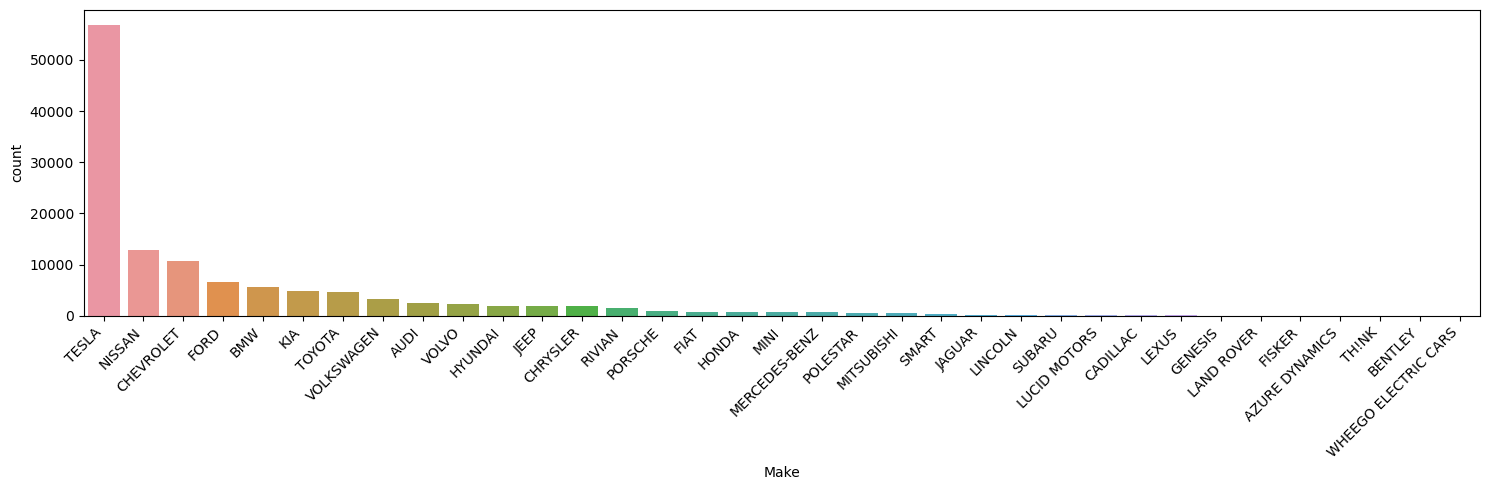

In [182]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(data = data, x = 'Make',  order = data.groupby('Make')['Model'].count().sort_values(ascending = False).index, orient = 'v')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [172]:
data['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

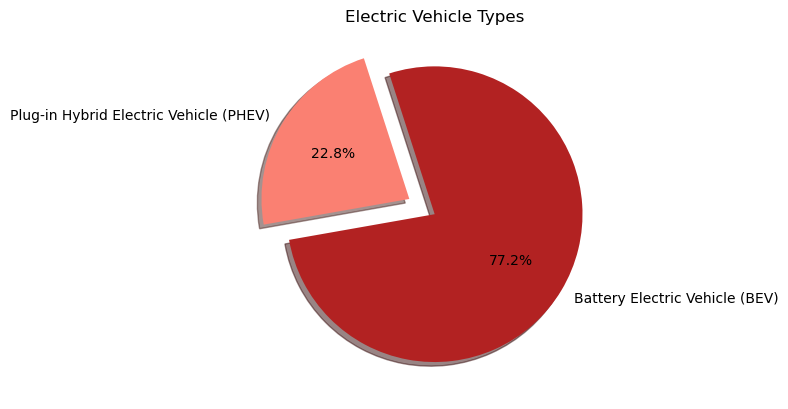

In [219]:
import matplotlib.pyplot as plt

counts = data['Electric Vehicle Type'].value_counts()

colors = ['firebrick', 'salmon']

explode = [0, 0.2]
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',startangle =190, colors=colors, explode=explode, shadow=True)

plt.title('Electric Vehicle Types')
plt.show()

In [193]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()


array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

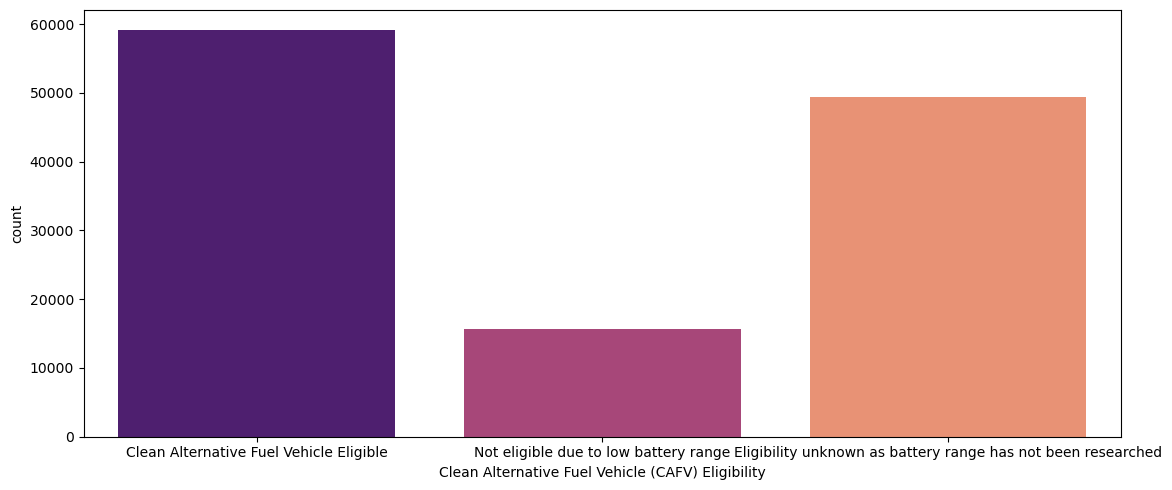

In [175]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(data = data, x = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', palette="magma")
plt.tight_layout()
plt.show()


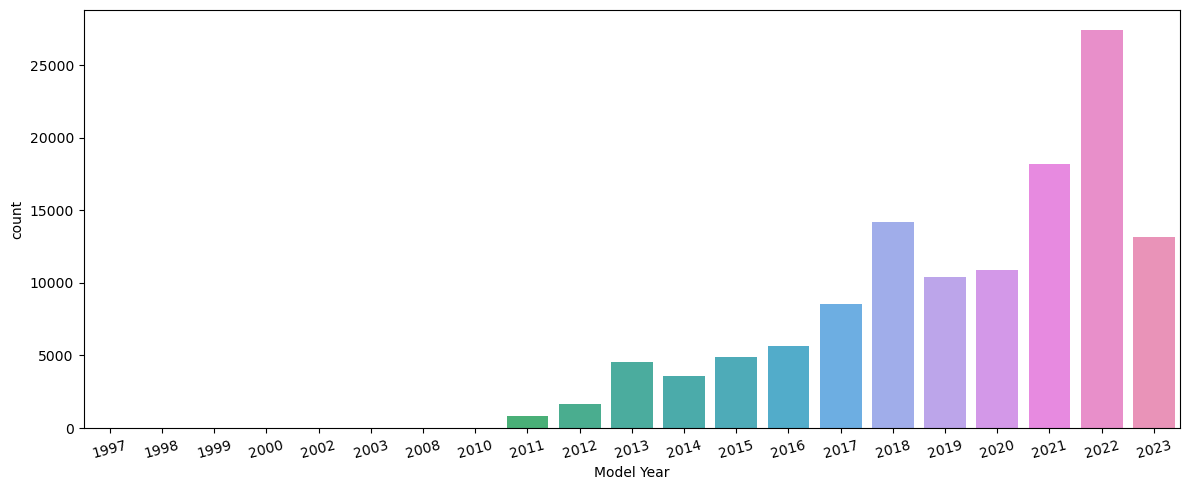

In [176]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(data = data, x = 'Model Year')
plt.xticks(rotation = 15, ha = 'center')
plt.tight_layout()
plt.show()


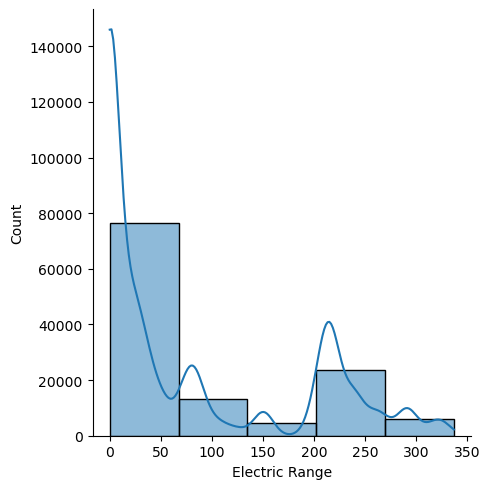

In [186]:
sns.displot(data = data, x = 'Electric Range', bins=5, kde='true')


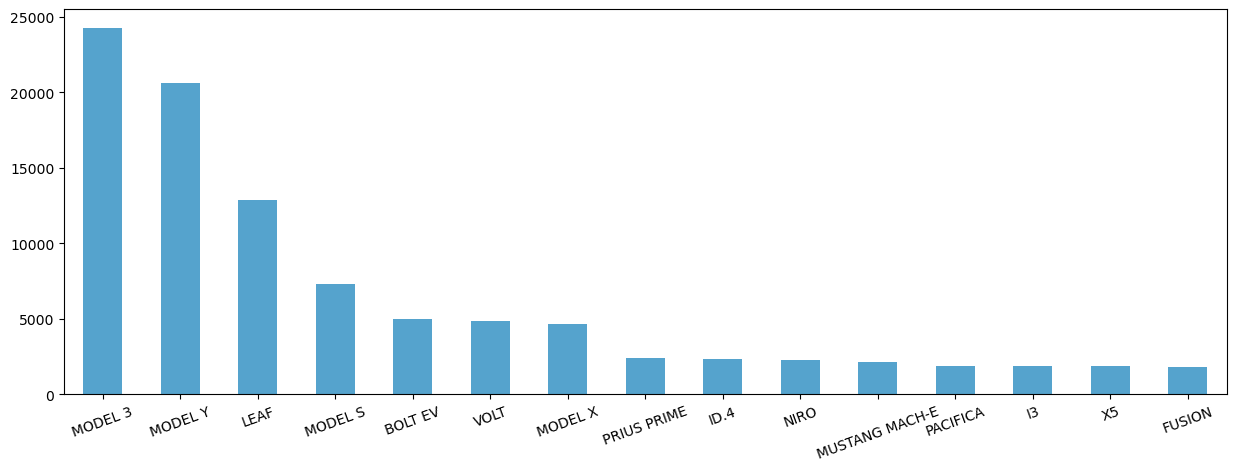

In [210]:
plt.figure(figsize=(15, 5))
data.Model.value_counts().head(15).plot(kind='bar')
plt.xticks(rotation=20)
plt.show()

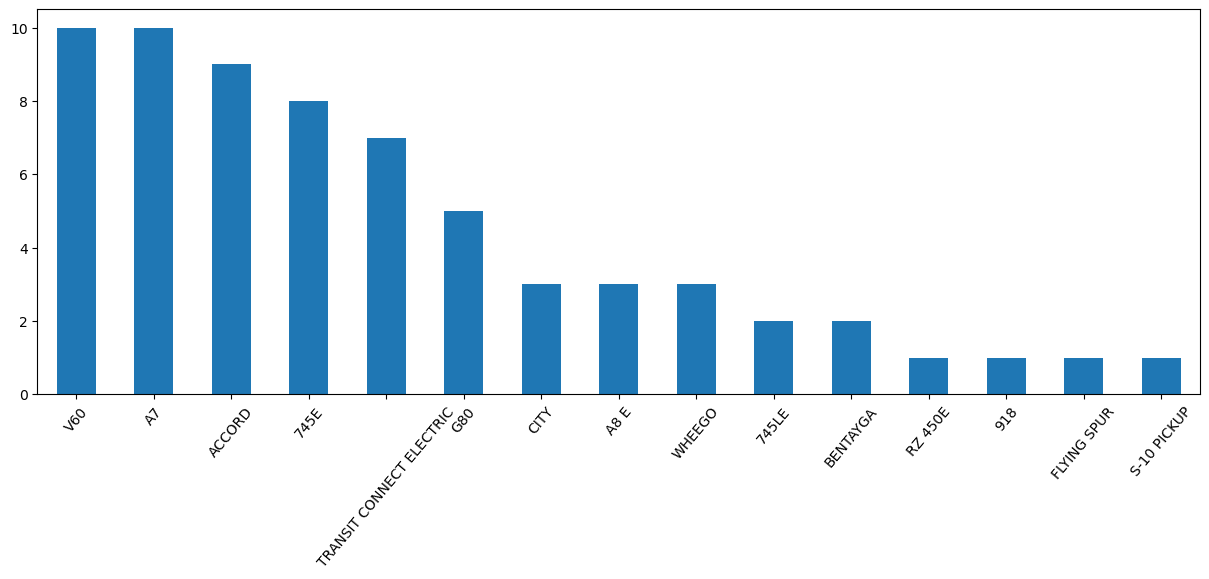

In [179]:
plt.figure(figsize = (15, 5))
data.Model.value_counts().tail(15).plot(kind = 'bar')
plt.xticks(rotation = 50, ha = 'center')
plt.show()


In [180]:
data['Base MSRP'].unique()


array([     0,  31950,  52900,  33950,  64950,  69900,  54950,  75095,
        32250,  81100,  53400,  39995,  44100,  36800,  36900,  98950,
        45600,  55700,  34995,  59900,  43700, 110950, 102000,  52650,
       184400,  90700,  89100,  91250, 109000,  32995, 845000],
      dtype=int64)